In [2]:
import torch
import numpy as np

# Данные для эксперимента

Text(0, 0.5, 'x2')

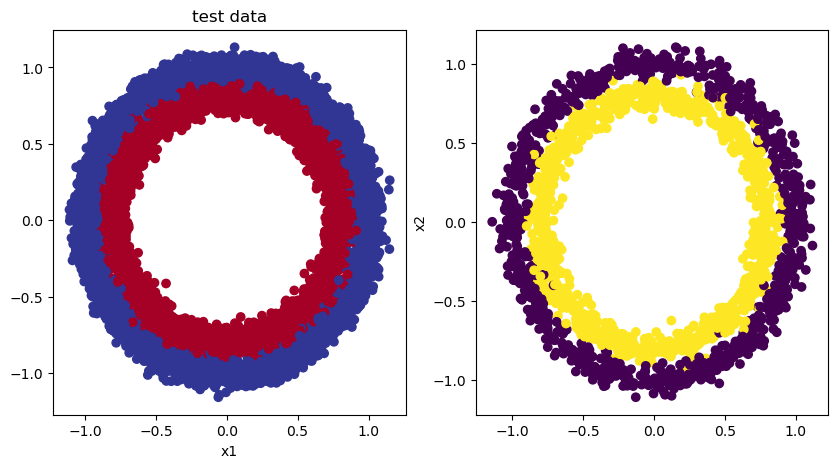

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=10000, noise=0.05)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu_r')

ax1.set_title('train data')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')

ax2.scatter(X_test[:, 0], X_test[:,1], c=y_test)

ax1.set_title('test data')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')

# Коцепция torch-датасета

In [4]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.X.shape[0]

In [5]:
train_data = MyDataset(X_train, y_train)

In [6]:
from torch.utils.data import DataLoader

batch_size = 64

train_dataloader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True
)

In [7]:
for i, (X_batch, y_batch) in enumerate(train_dataloader):
    print(f'batch #{i}, X_shape: {X_batch.shape}, y_shape:{y_batch.shape}')

batch #0, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #1, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #2, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #3, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #4, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #5, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #6, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #7, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #8, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #9, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #10, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #11, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #12, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #13, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #14, X_shape: torch.Size([64, 2]), y_shape:torch.Size([64])
batch #15, X_shape: 

# Собираем сеть

In [8]:
import torch.nn as nn

class MyNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.hidden = nn.Linear(input_dim, hidden_dim)
        
        self.f1 = nn.ReLU()
        
        self.output = nn.Linear(hidden_dim, output_dim)
        
        self.f2 = nn.Sigmoid()
        
    def forward(self, x):
        x = self.f1(self.hidden(x))
        x = self.f2(self.output(x))
        
        return x

In [9]:
my_net = MyNet(2, 16, 1)

print(my_net)

MyNet(
  (hidden): Linear(in_features=2, out_features=16, bias=True)
  (f1): ReLU()
  (output): Linear(in_features=16, out_features=1, bias=True)
  (f2): Sigmoid()
)


In [10]:
y_pred = my_net(X_test)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [11]:
y_pred = my_net(torch.from_numpy(X_test.astype(np.float32)))

Text(0, 0.5, 'x2')

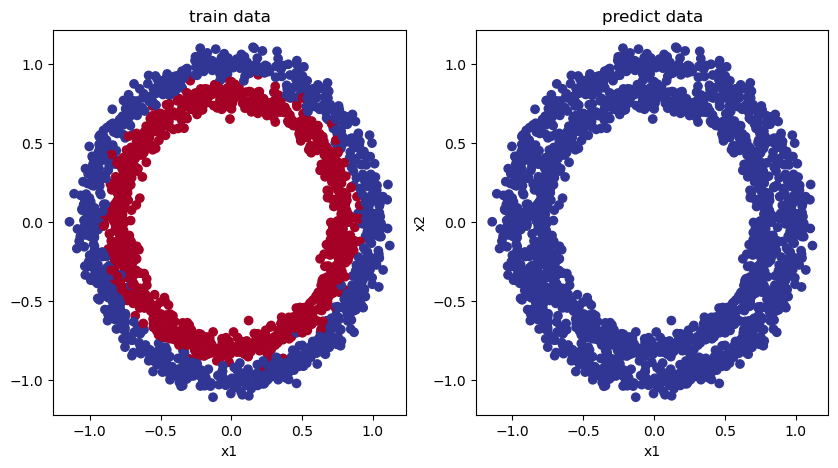

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu_r')

ax1.set_title('train data')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')

y = y_pred.detach().numpy()

y = [1 if i > .5 else 0. for i in y]


ax2.scatter(X_test[:, 0], X_test[:,1], c=y, cmap='RdYlBu_r')

ax2.set_title('predict data')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')

# Функция потерь и оптимизатор

In [13]:
loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(my_net.parameters(), lr=0.1)

In [14]:
num_epochs = 50

loss_values = []

for epoch in range(num_epochs):
    for X, y in train_dataloader:
        
        pred = my_net(X)
        
        loss = loss_fn(pred, y.unsqueeze(-1))
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    loss = loss_fn(pred, y.unsqueeze(-1))
    loss_values.append(loss.item())

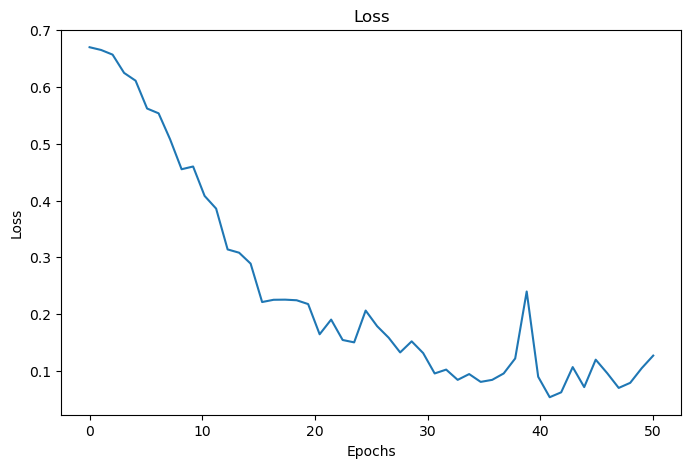

In [15]:
step = np.linspace(0, num_epochs)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Text(0, 0.5, 'x2')

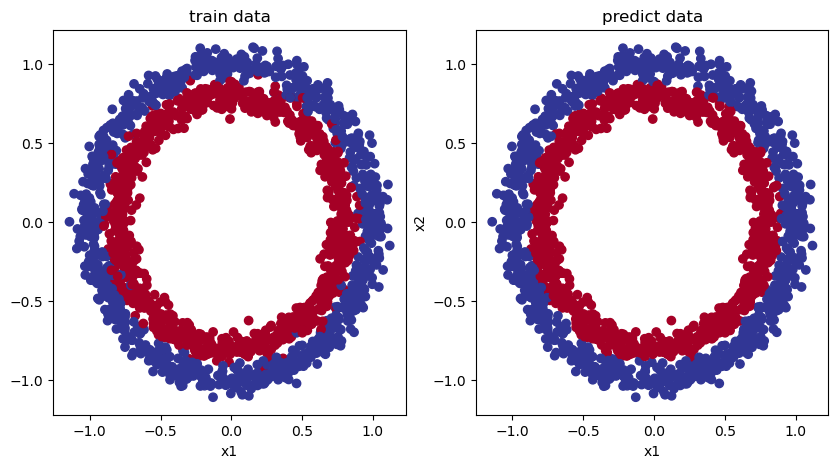

In [16]:
with torch.no_grad():
    y_pred = my_net(torch.from_numpy(X_test.astype(np.float32)))
    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu_r')

ax1.set_title('train data')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')

y = y_pred.detach().numpy()

y = [1 if i > .5 else 0. for i in y]


ax2.scatter(X_test[:, 0], X_test[:,1], c=y, cmap='RdYlBu_r')

ax2.set_title('predict data')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')